In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('penyakit_ginjal_kronik.csv')
df.sample()

,id,umur,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
376,376,58.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,9100,5.2,no,no,no,good,no,no,notckd


In [38]:
df = df.drop(['id','umur'], axis=1)

In [39]:
df.sample()

,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,gds,ureum,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
390,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,25.0,...,52,6300,5.3,no,no,no,good,no,no,notckd


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tekanandarah     388 non-null    float64
 1   gravitas         353 non-null    float64
 2   albumin          354 non-null    float64
 3   sugar            351 non-null    float64
 4   seldarahmerah    248 non-null    object 
 5   pussel           335 non-null    object 
 6   puscell          396 non-null    object 
 7   bakteri          396 non-null    object 
 8   gds              356 non-null    float64
 9   ureum            381 non-null    float64
 10  kreatinin        383 non-null    float64
 11  natrium          313 non-null    float64
 12  kalium           312 non-null    float64
 13  hemoglobin       348 non-null    float64
 14  MCV              330 non-null    object 
 15  seldarahputih    295 non-null    object 
 16  seldarahmerah.1  270 non-null    object 
 17  hipertensi      

In [41]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [42]:
numerical

['tekanandarah',
 'gravitas',
 'albumin',
 'sugar',
 'gds',
 'ureum',
 'kreatinin',
 'natrium',
 'kalium',
 'hemoglobin']

In [43]:
catgcols

['seldarahmerah',
 'pussel',
 'puscell',
 'bakteri',
 'MCV',
 'seldarahputih',
 'seldarahmerah.1',
 'hipertensi',
 'diabetes',
 'cad',
 'nafsumakan',
 'edema',
 'anemia',
 'klasifikasi']

In [44]:
df['klasifikasi'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: klasifikasi, dtype: int64

In [45]:
df['klasifikasi'] = df['klasifikasi'].replace(['ckd\t'],'ckd')

In [46]:
df['klasifikasi'].value_counts()

ckd       250
notckd    150
Name: klasifikasi, dtype: int64

In [47]:
ind_col = [col for col in df.columns if col != 'klasifikasi']
dep_col = 'klasifikasi'

In [48]:
df[dep_col].value_counts()

ckd       250
notckd    150
Name: klasifikasi, dtype: int64

transormasi dataset

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])


In [50]:
df['klasifikasi'] = le.fit_transform(df['klasifikasi'])

In [51]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [52]:
df.head()

,tekanandarah,gravitas,albumin,sugar,seldarahmerah,pussel,puscell,bakteri,gds,ureum,...,MCV,seldarahputih,seldarahmerah.1,hipertensi,diabetes,cad,nafsumakan,edema,anemia,klasifikasi
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,31,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,31,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,31,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,18,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,25,0,3,1,0,0,0,0


In [53]:
df.to_csv('ginjal-kronik.csv')

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

membuat model decision tree

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()

print(f"classification report : \n{classification_report(y_test, dtc.predict(x_test))}")


akurasi data training = 0.99375
akurasi data testing = 1.0 

confusion matrix : 
[[52  0]
 [ 0 28]]

classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



simulasi model

In [56]:
import numpy as np

input_data = (80.0, 1.02, 1.0, 0.0, 1, 1, 0, 0, 121.0, 36.0, 1.2, 138.0, 4.4, 15.4, 32, 72, 31, 1, 4, 1, 0, 0, 0)

# Ubah data input menjadi numpy array
input_data_as_numpy_array = np.array(input_data)

# Lakukan reshape agar sesuai dengan format yang digunakan dalam model
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Prediksi dengan model
prediction = model.predict(input_data_reshape)

if (prediction[0] == 0):
    print('Pasien tidak terkena batu ginjal')
else:
    print('Pasien terkena batu ginjal')

Pasien tidak terkena batu ginjal


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


visualisasi pohon keputusan

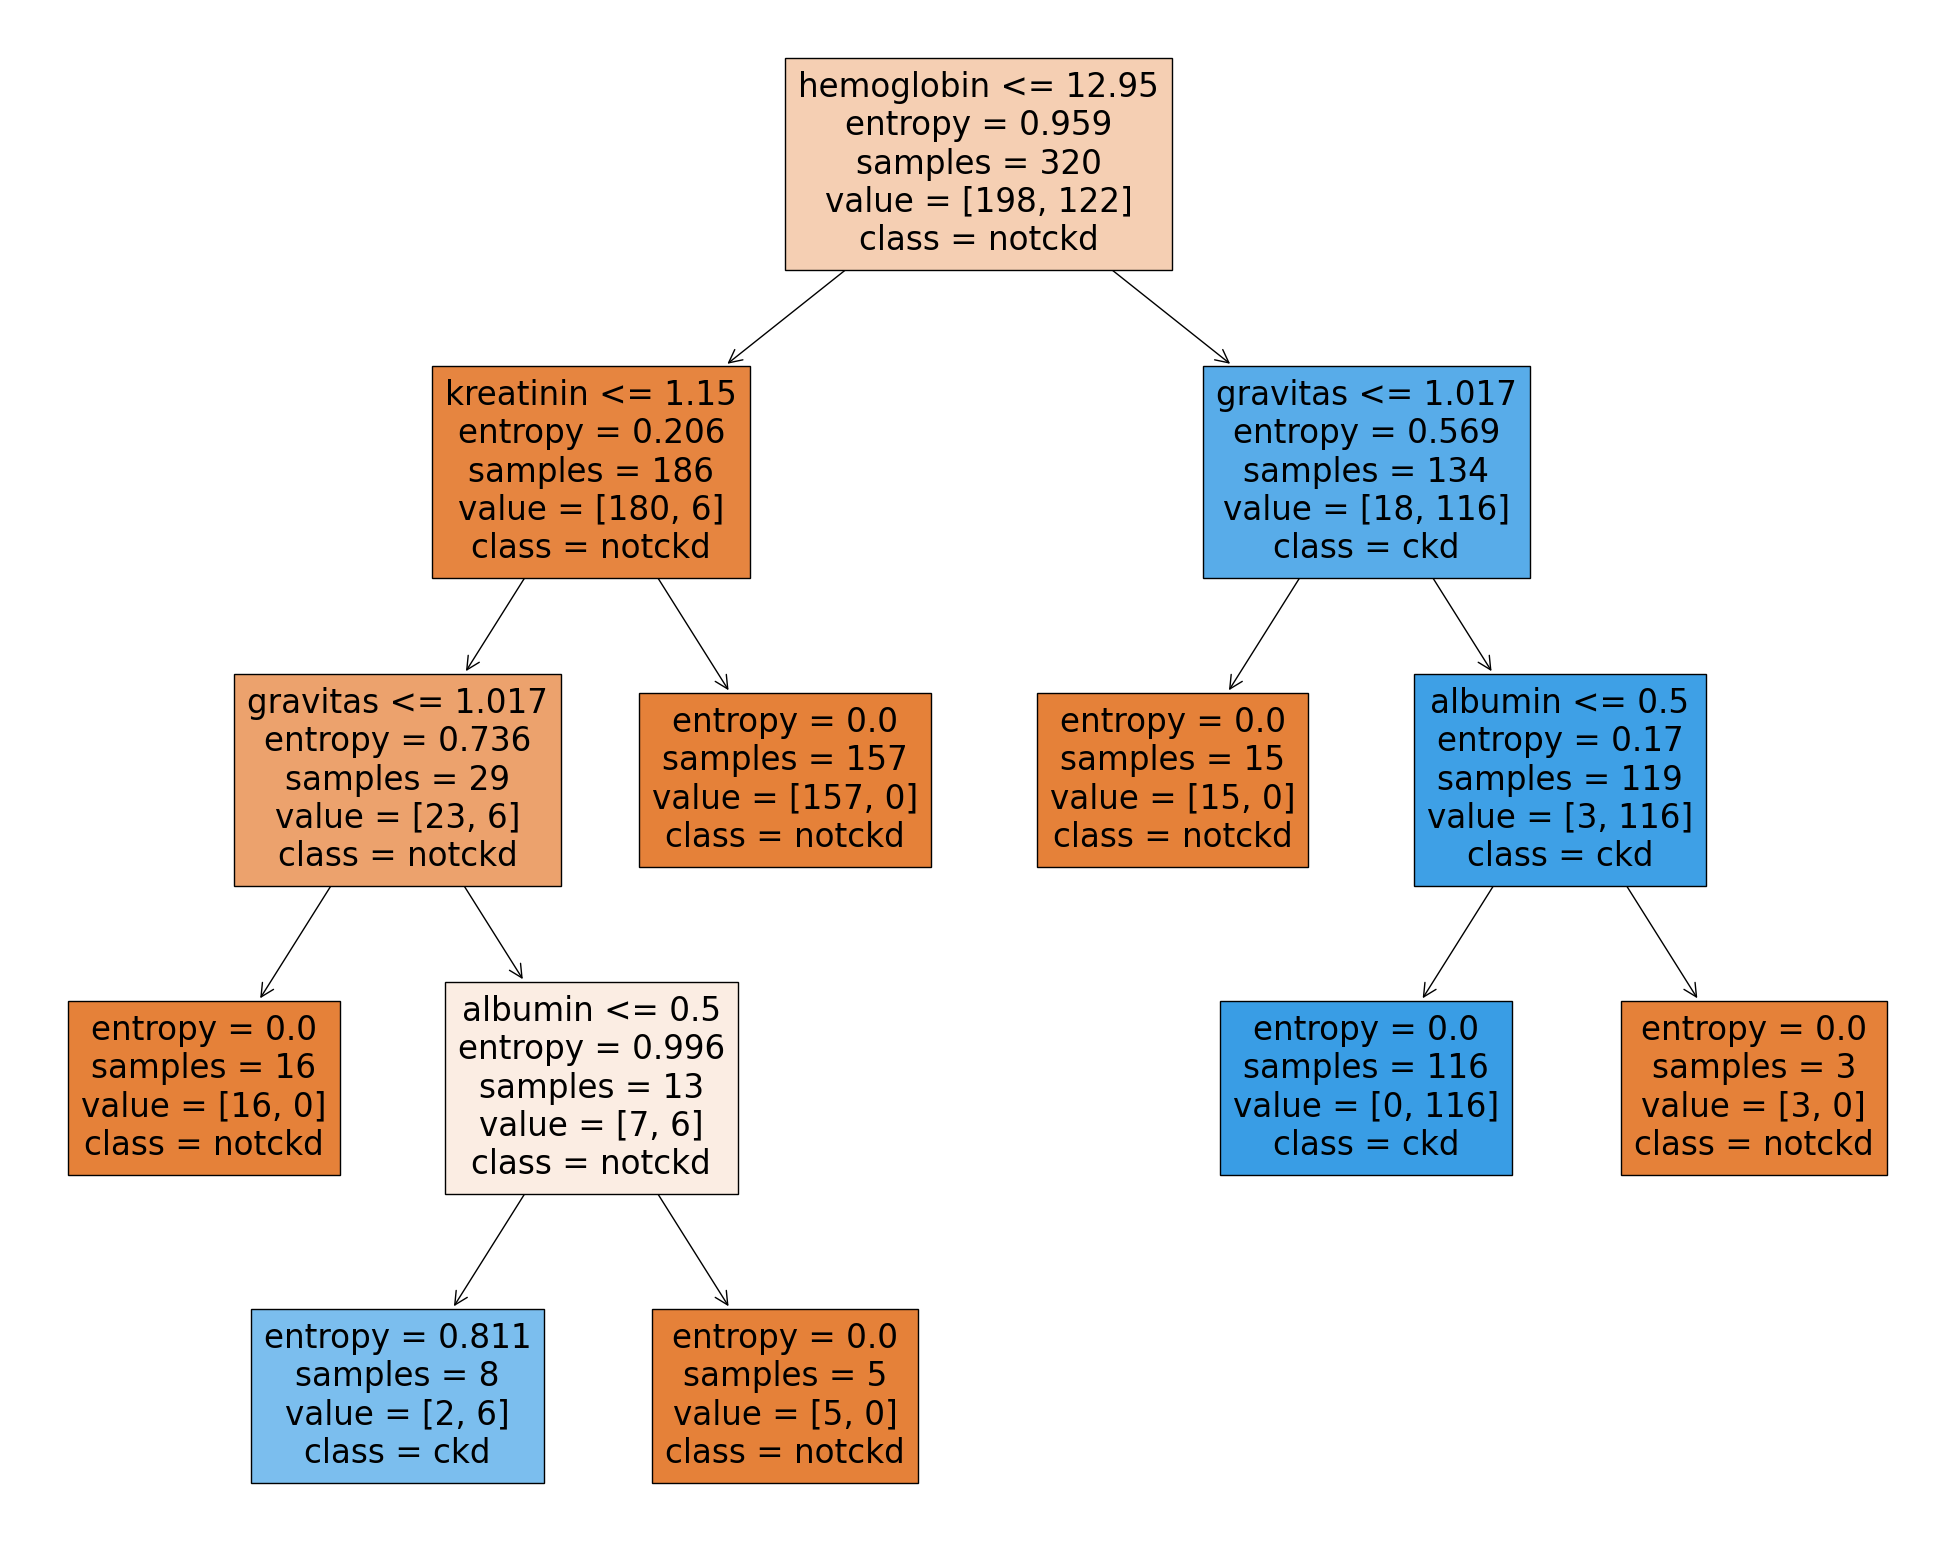

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['notckd', 'ckd'],
                   filled=True)